In [3]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [91]:
class SongList:
    def __init__(self):
        self.song_dict = {}
        self.table = None
        self.df = None
        
    def extract_table(self,url):    
        response = requests.request("GET", url)
        soup = BeautifulSoup(response.content.decode('utf-8', 'ignore'), "lxml")
        table = soup.find_all('table')[0]
        self.table = table
    
    def parse_songlist(self):
        """ Extracts high-level songlist
        """
        table = self.table
        for idx, row in enumerate(table.find_all('tr')):
            if idx == 0:
                headers = table.find_all('th')
                header_row = [head.get_text() for head in headers]
                empty_lists = [list() for head in headers]
                self.song_dict = {key: value for key, value in zip(header_row, empty_lists)}
                self.song_dict['Link'] = []
                continue
            col = row.find_all('td')
            col_text = [entry.get_text() for entry in col]
            col_dict = {key: value for key, value in zip(header_row, col_text)}
            col_dict['Link'] = row.find_all(href = True)[0]['href'] 
            if len(col_text) != len(header_row):
                continue                 # remove merged cells
            for key, val in col_dict.items():
                self.song_dict[key].extend([val])
    
    def parse_performances(self):
        
    
    def load_df(self):
        df = pd.DataFrame(self.song_dict)
        df = df.replace('—',np.NaN)
        df['Gap'] = [int(x) for x in df['Gap'].values]
        df = df.replace(df['Gap'].max(), np.nan)
        df['Times'] = [int(x) for x in df['Times'].values]
        df['Debut'] = [pd.to_datetime(x) for x in df['Debut'].values]
        df['Last']  = [pd.to_datetime(x) for x in df['Last'].values]
        df['Tenure'] = (df['Last'] - df['Debut']).dt.days
        df['Play_Ratio'] = df['Times'] / df['Tenure']
        df.Play_Ratio = df.Play_Ratio.replace(np.inf, 0)
        self.df = df
        
    
class Library:
    def __init__(self):
        self.artist = []

In [93]:
phish_songlist = SongList()
phish_songlist.extract_table('http://phish.net/song')
phish_songlist.parse_songlist()

phish_songlist.load_df()
phish_songlist.df.head()


,Debut,Gap,Last,Link,Original Artist,Song Name,Times,Tenure,Play_Ratio
0,1985-03-16,13.0,2017-07-29,/song/alumni-blues,Phish,Alumni Blues,107,11823,0.009050
1,1986-02-03,0.0,2017-12-31,/song/you-enjoy-myself,Phish,You Enjoy Myself,581,11654,0.049854
2,1986-04-01,3.0,2017-12-28,/song/acdc-bag,Phish,AC/DC Bag,310,11594,0.026738
3,1987-04-29,8.0,2017-08-05,/song/fuck-your-face,Phish,Fuck Your Face,13,11056,0.001176
4,1987-05-11,14.0,2017-07-28,/song/divided-sky,Phish,Divided Sky,412,11036,0.037332


In [84]:
df = phish_songlist.df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 9 columns):
Debut              877 non-null datetime64[ns]
Gap                875 non-null float64
Last               877 non-null datetime64[ns]
Link               877 non-null object
Original Artist    877 non-null object
Song Name          877 non-null object
Times              877 non-null int64
Tenure             877 non-null int64
Play_Ratio         877 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 61.7+ KB


In [70]:
cf = df[df['Original Artist'] == 'Phish']
cf = cf[cf.Times.values > 10]
cf['Tenure'] = (cf['Last'] - cf['Debut']).dt.days
cf['Play_Ratio'] = cf['Times'] / cf['Tenure']
cf = cf.sort_values('Play_Ratio', ascending = True)

In [74]:
cf

,Debut,Gap,Last,Link,Original Artist,Song Name,Times,Length,Play_Ratio
4,1987-04-29,8.0,2017-08-05,/song/fuck-your-face,Phish,Fuck Your Face,14,11056,0.001266
75,1994-04-09,54.0,2016-07-20,/song/demand,Phish,Demand,16,8138,0.001966
250,1995-09-27,79.0,2015-09-06,/song/keyboard-army,Phish,Keyboard Army,15,7284,0.002059
262,1992-11-21,4.0,2017-09-03,/song/buffalo-bill,Phish,Buffalo Bill,19,9052,0.002099
11,1985-10-30,221.0,2012-06-20,/song/dog-log,Phish,Dog Log,24,9730,0.002467
158,2003-01-04,37.0,2016-10-25,/song/friday,Phish,Friday,13,5043,0.002578
412,1998-07-21,62.0,2016-07-06,/song/bittersweet-motel,Phish,Bittersweet Motel,17,6560,0.002591
26,1986-04-01,150.0,2013-12-31,/song/icculus,Phish,Icculus,27,10136,0.002664
157,2003-01-02,72.0,2016-01-17,/song/mexican-cousin,Phish,Mexican Cousin,13,4763,0.002729
86,1996-08-05,337.0,2009-11-01,/song/talk,Phish,Talk,14,4836,0.002895


In [60]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 754 to 22
Data columns (total 9 columns):
Debut              187 non-null datetime64[ns]
Gap                187 non-null float64
Last               187 non-null datetime64[ns]
Link               187 non-null object
Original Artist    187 non-null object
Song Name          187 non-null object
Times              187 non-null int64
Length             187 non-null timedelta64[ns]
Play_Ratio         187 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(3), timedelta64[ns](2)
memory usage: 19.6+ KB


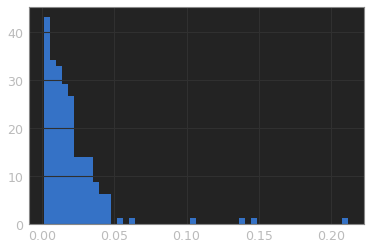

In [72]:
plt.hist(cf.Play_Ratio, bins=50, normed=True)
plt.show()

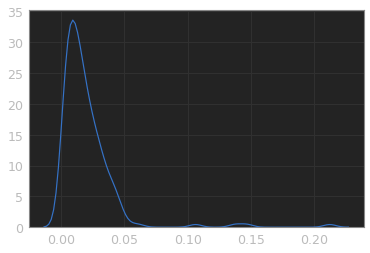

In [73]:
sns.kdeplot(cf.Play_Ratio.values)
plt.show()

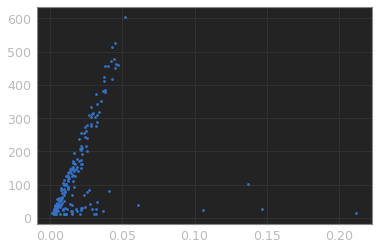

In [79]:
plt.plot(cf.Play_Ratio.values, cf.Times.values, marker = '.', linestyle = 'none')
plt.show()